In [97]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

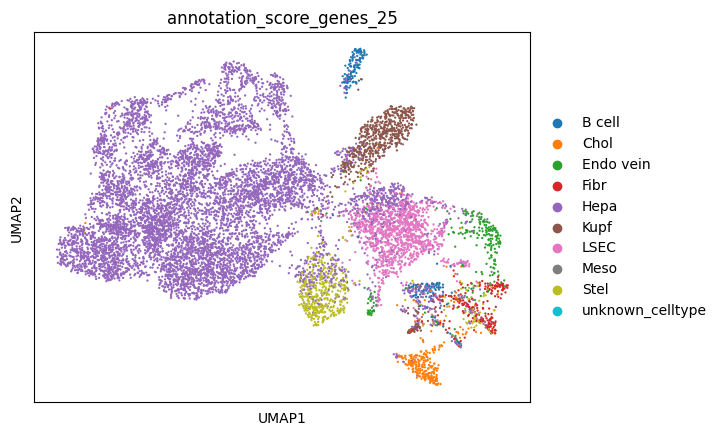

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             1.950481
Chol                               2.511578
Endo vein                          2.066263
Fibr                               2.030638
Hepa                              70.137157
Kupf                               5.860349
LSEC                              10.758817
Meso                               0.115782
Stel                               4.551122
unknown_celltype                   0.017813


In [4]:
# Original score_genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

0.25


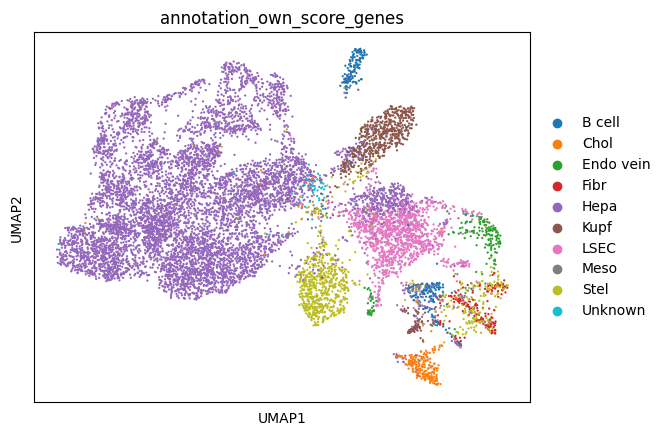

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.582829
Chol                         2.155326
Endo vein                    1.585322
Fibr                         1.505166
Hepa                        66.129320
Kupf                         5.931600
LSEC                        11.417884
Meso                         0.409690
Stel                         7.766299
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,NaN,0.021096,0.085765,0.021767,NaN,0.020318,NaN,NaN
1,NaN,0.055902,NaN,NaN,0.376261,NaN,0.241621,NaN,0.526007
2,NaN,NaN,NaN,NaN,0.019384,NaN,0.274330,NaN,0.717227
3,0.199726,NaN,NaN,0.036456,NaN,NaN,0.154209,NaN,0.229382
4,0.234711,NaN,NaN,0.069145,NaN,0.056901,0.022204,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.313497,NaN,NaN,0.059235,NaN,0.061714,0.020161,NaN,NaN
11224,0.511616,NaN,NaN,0.081015,0.051679,0.072720,0.028773,NaN,NaN
11225,0.354052,NaN,NaN,0.058203,0.049886,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.063038,0.602880,0.242782,NaN,NaN


In [5]:
# Own score genes with basic marker gene list
scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

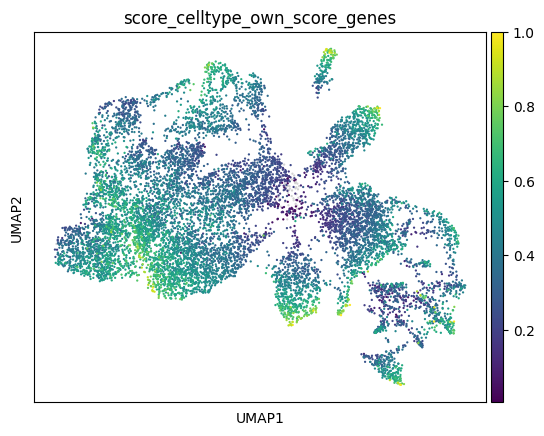

In [6]:
sc.pl.umap(sdata.table,color=['score_celltype_own_score_genes'])

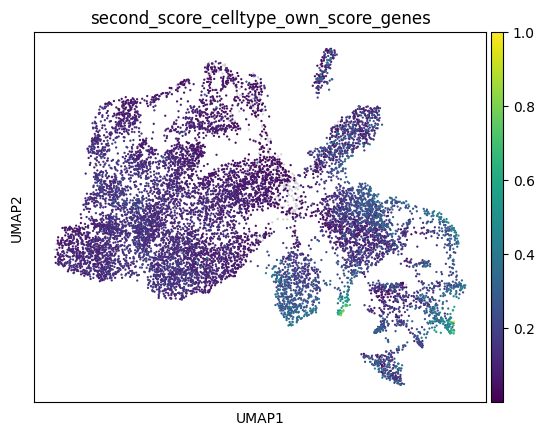

In [7]:
sc.pl.umap(sdata.table,color=['second_score_celltype_own_score_genes'])

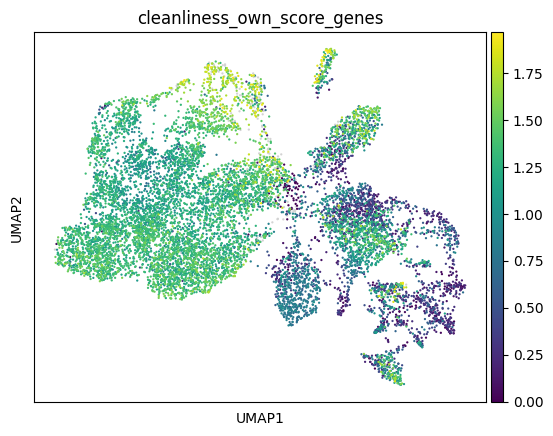

In [8]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes'])

In [9]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"

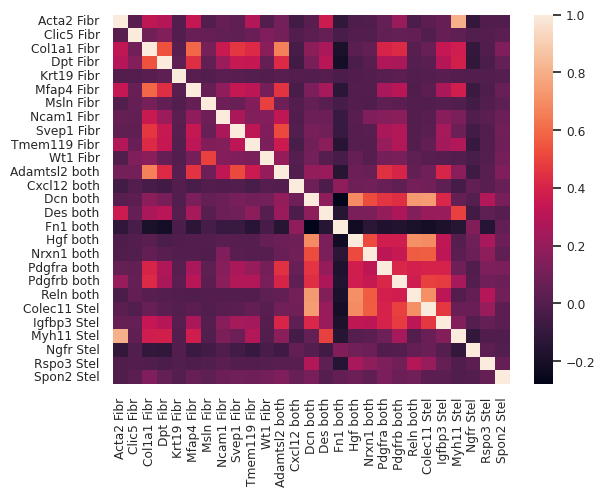

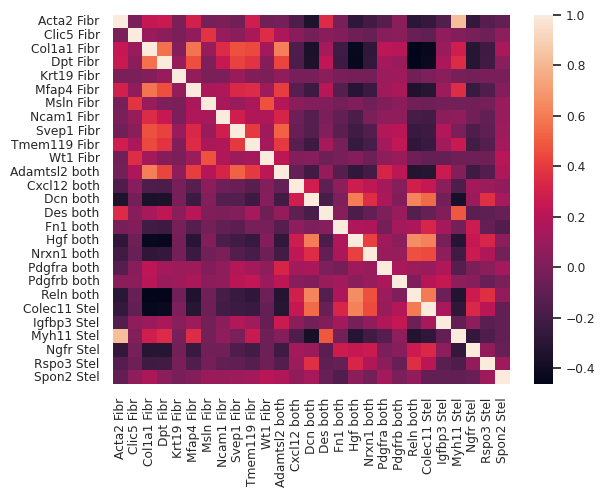

In [10]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between fibroblasts and stellate cells
# expression of all cells
sns.set(font_scale=0.8)
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'Fibr','Stel')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'Fibr') | (sdata.table.obs['annotation_own_score_genes'] == 'Stel'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'Fibr','Stel')

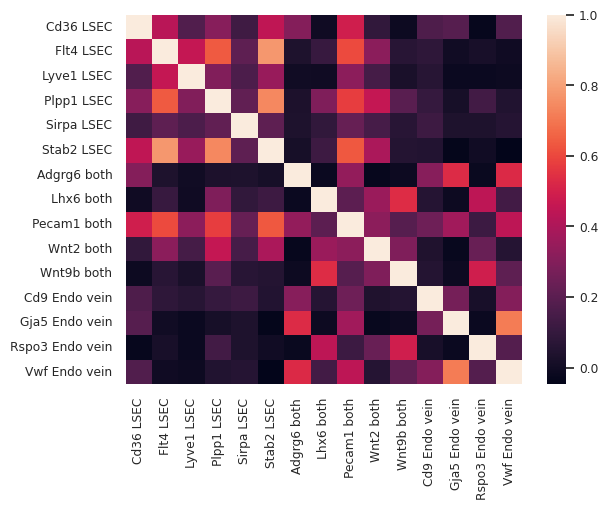

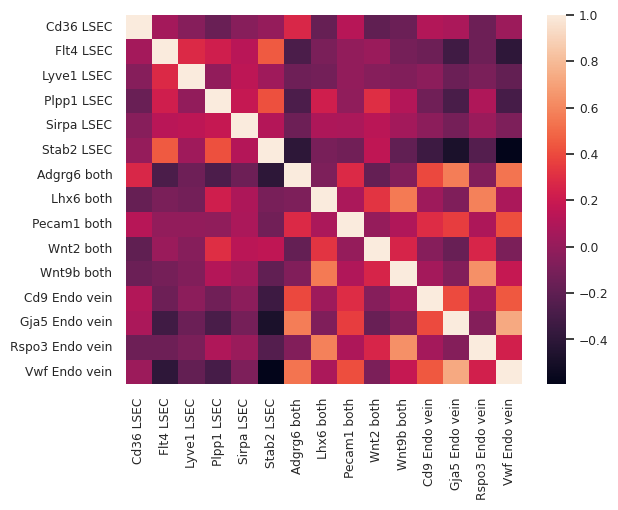

In [11]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between LSECs and Endo vein cells
# expression of all cells
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'LSEC','Endo vein')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'LSEC') | (sdata.table.obs['annotation_own_score_genes'] == 'Endo vein'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'LSEC','Endo vein')

<AxesSubplot: >

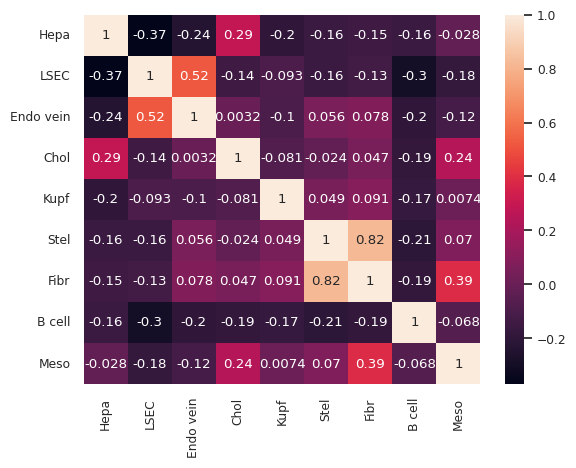

In [12]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

<AxesSubplot: xlabel='total_counts', ylabel='annotation_own_score_genes'>

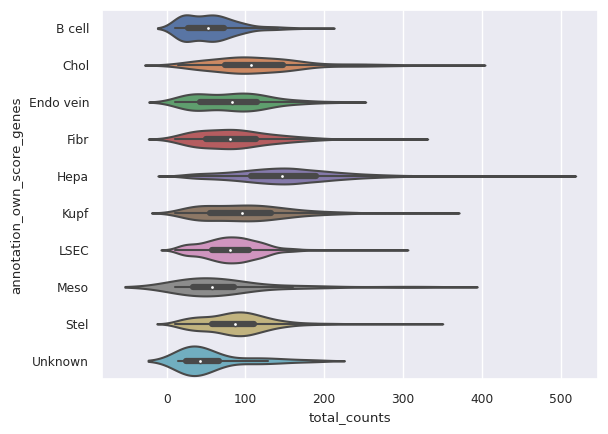

In [13]:
sdata.table.obs
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")

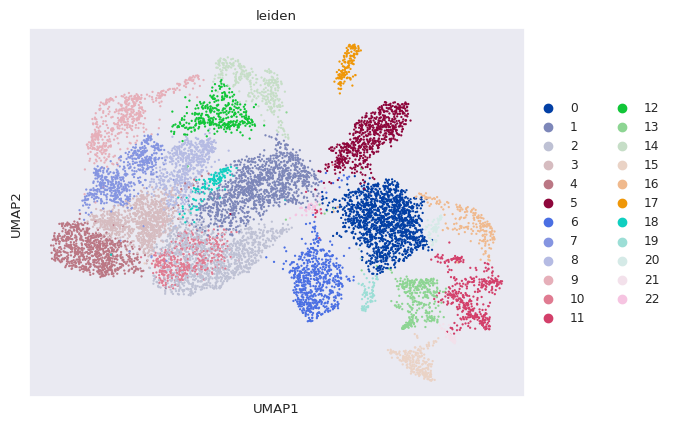

In [14]:
sc.tl.leiden(sdata.table,resolution=1,key_added='leiden')
sdata.table.obs
sc.pl.umap(sdata.table,color=['leiden'])

In [17]:
# STRATEGY 1 to change the marker gene list
# overap markers between:
# Stel and Fibr
# Endo vein and LSEC
# Meso and Fibr
# Hepa and Chol

In [112]:
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell']
leiden_clusters = [[1,2,3,4,7,8,9,10,12,14,18,20,21,22],[5],[0],[16,19],[11],[6],[13],[15],[17]]
n_ct = len(cell_types)
marker_gene_drop = {}
for i in range(n_ct):
    for j in range(i+1,n_ct):
        d = DEGs_between_2_sets_leiden_clusters_compared_to_markers(sdata,cell_types[i],leiden_clusters[i],cell_types[j],leiden_clusters[j],path_mg)
        print('overlap between '+cell_types[i]+' and '+cell_types[j]+' investigated')
        print(cell_types[i])
        print('Maybe drop:'+str(d['drop_'+cell_types[i]]))
        print(cell_types[j])
        print('Maybe drop:'+str(d['drop_'+cell_types[j]]))
        if len(d['drop_'+cell_types[i]])>0:
            if i in marker_gene_drop:
                marker_gene_drop[i].append(d['drop_'+cell_types[i]])
            else:
                marker_gene_drop[i] = d['drop_'+cell_types[i]]
        if len(d['drop_'+cell_types[j]])>0:
            if j in marker_gene_drop:
                marker_gene_drop[j].append(d['drop_'+cell_types[j]])
            else:
                marker_gene_drop[j] = d['drop_'+cell_types[j]]
print('Summary:')
for key in marker_gene_drop.keys():
    print(cell_types[key])
    print('Maybe drop:'+str(marker_gene_drop[key]))

overlap between Hepa and Kupf investigated
Hepa
Maybe drop:[]
Kupf
Maybe drop:[]
overlap between Hepa and LSEC investigated
Hepa
Maybe drop:[]
LSEC
Maybe drop:[]
overlap between Hepa and Endo vein investigated
Hepa
Maybe drop:[]
Endo vein
Maybe drop:[]
overlap between Hepa and Fibr investigated
Hepa
Maybe drop:[]
Fibr
Maybe drop:['Fn1']
overlap between Hepa and Stel investigated
Hepa
Maybe drop:[]
Stel
Maybe drop:['Fn1']
overlap between Hepa and Meso investigated
Hepa
Maybe drop:[]
Meso
Maybe drop:[]
overlap between Hepa and Chol investigated
Hepa
Maybe drop:[]
Chol
Maybe drop:['Fn1']
overlap between Hepa and B cell investigated
Hepa
Maybe drop:[]
B cell
Maybe drop:[]
overlap between Kupf and LSEC investigated
Kupf
Maybe drop:[]
LSEC
Maybe drop:[]
overlap between Kupf and Endo vein investigated
Kupf
Maybe drop:[]
Endo vein
Maybe drop:[]
overlap between Kupf and Fibr investigated
Kupf
Maybe drop:[]
Fibr
Maybe drop:[]
overlap between Kupf and Stel investigated
Kupf
Maybe drop:[]
Stel
May

In [53]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
fibro_drop = ['Hgf', 'Nrxn1', 'Fn1', 'Cxcl12']
lsec_drop = ['Adgrg6', 'Lhx6', 'Wnt9b']
chol_drop = ['Fn1']
df_mg.loc[fibro_drop,'Fibr'] = 0
df_mg.loc[lsec_drop,'LSEC'] = 0
df_mg.loc[chol_drop,'Chol'] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified1.csv")

0.25


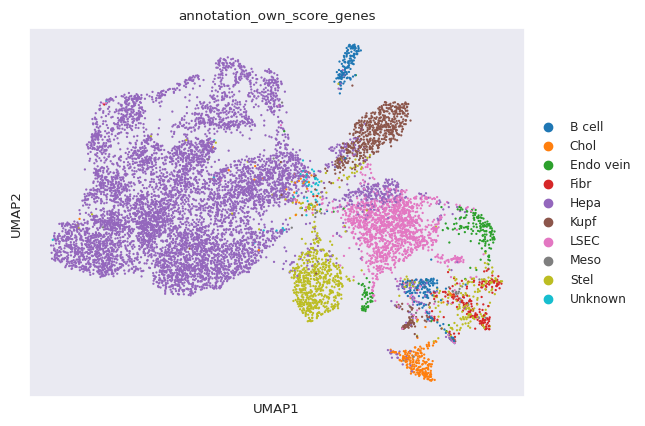

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.520485
Chol                         2.190951
Endo vein                    1.843605
Fibr                         1.710011
Hepa                        65.051657
Kupf                         5.851443
LSEC                        12.531172
Meso                         0.409690
Stel                         7.454578
Unknown                      0.436409


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,NaN,0.021096,0.040681,0.021767,NaN,NaN,NaN,NaN
1,NaN,0.073657,NaN,NaN,0.376261,NaN,0.264054,NaN,0.526007
2,NaN,NaN,NaN,0.010561,0.019384,NaN,0.297169,NaN,0.717227
3,0.199726,NaN,NaN,NaN,NaN,NaN,0.150841,NaN,0.229382
4,0.234711,NaN,NaN,0.019455,NaN,0.056901,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.313497,NaN,NaN,0.014054,NaN,0.061714,NaN,NaN,NaN
11224,0.511616,NaN,NaN,0.016475,0.051679,0.072720,NaN,NaN,NaN
11225,0.354052,NaN,NaN,0.034326,0.049886,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.063038,0.602880,0.156434,NaN,NaN


In [24]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified1.csv"
scores = own_score_genes(sdata,path_mg_mod)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [19]:
# STRATEGY 2 to change the marker gene list

In [49]:
dict_DEGs = DEGs_between_each_leiden_cluster_and_rest_compared_to_markers(sdata,['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell'],[[1,2,3,4,7,8,9,10,12,14,18,20,21,22],[5],[0],[16,19],[11],[6],[13],[15],[17]],path_mg)
df_mg = pd.read_csv(path_mg,index_col=0)
genes = sdata.table.var_names
marker_genes = df_mg.index.tolist()
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell']
marker_gene_add = {}
for gene in genes:
    candidates = []
    for i in cell_types:
        if gene in dict_DEGs['pos_DEGs_but_not_marker'][i]['gene'].tolist():
            candidates.append(i)
            if i in marker_gene_add:
                marker_gene_add[i].append(gene)
            else:
                marker_gene_add[i] = [gene]
                
    if(len(candidates) > 0):
        print(gene)
        if gene in marker_genes:
            a = df_mg.loc[gene,:]
            b = a[a==1].index.values
            print('Is marker gene of: '+str(b.tolist()))
            print('Could also be a marker gene of: '+str(candidates))
        else:
            print('Is marker gene of: []')
            print('Could also be a marker gene of: '+str(candidates))

Acta2
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Endo vein']
Adamtsl2
Is marker gene of: ['Stel', 'Fibr']
Could also be a marker gene of: ['Meso', 'Chol']
Adgre1
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Meso']
Adgrg6
Is marker gene of: ['LSEC', 'Endo vein']
Could also be a marker gene of: ['Chol']
Atp6v0d2
Is marker gene of: []
Could also be a marker gene of: ['Hepa']
Axl
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Fibr', 'Stel', 'Meso']
C5ar1
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Meso']
Ccr2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Ccr7
Is marker gene of: ['B cell']
Could also be a marker gene of: ['Meso']
Cd209a
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Cd36
Is marker gene of: ['LSEC']
Could also be a marker gene of: ['Endo vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Cd5l
Is marker gene of: ['Kupf']
Could also be a marker gene of:

In [54]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = marker_gene_add.keys()
for key in keys:
    df_mg.loc[marker_gene_add[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified2.csv")

0.25


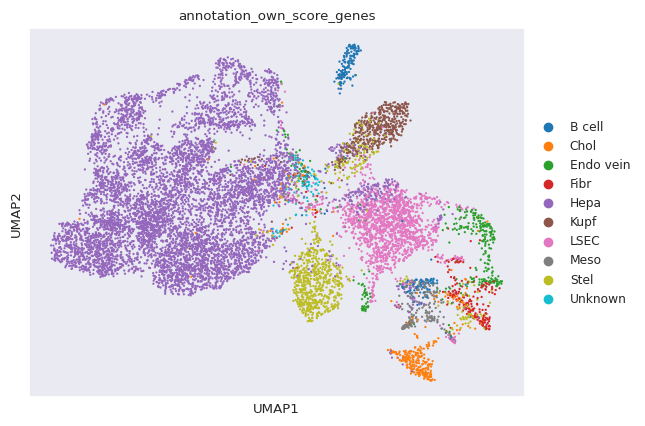

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.092982
Chol                         2.867830
Endo vein                    2.912362
Fibr                         1.763449
Hepa                        61.943356
Kupf                         4.649092
LSEC                        13.822586
Meso                         1.977200
Stel                         7.187389
Unknown                      0.783755


In [55]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified2.csv"
scores = own_score_genes(sdata,path_mg_mod)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

0.25


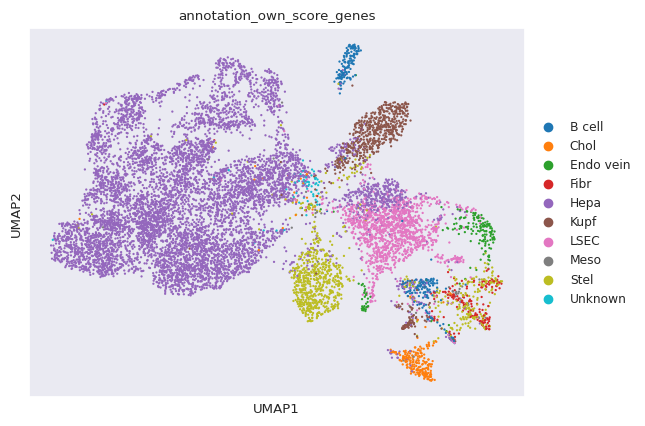

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.582829
Chol                         2.155326
Endo vein                    1.585322
Fibr                         1.505166
Hepa                        66.129320
Kupf                         5.931600
LSEC                        11.417884
Meso                         0.409690
Stel                         7.766299
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,NaN,0.021096,0.085765,0.021767,NaN,0.020318,NaN,NaN
1,NaN,0.055902,NaN,NaN,0.376261,NaN,0.241621,NaN,0.526007
2,NaN,NaN,NaN,NaN,0.019384,NaN,0.274330,NaN,0.717227
3,0.199726,NaN,NaN,0.036456,NaN,NaN,0.154209,NaN,0.229382
4,0.234711,NaN,NaN,0.069145,NaN,0.056901,0.022204,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.313497,NaN,NaN,0.059235,NaN,0.061714,0.020161,NaN,NaN
11224,0.511616,NaN,NaN,0.081015,0.051679,0.072720,0.028773,NaN,NaN
11225,0.354052,NaN,NaN,0.058203,0.049886,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.063038,0.602880,0.242782,NaN,NaN


In [25]:
scores = own_score_genes(sdata,path_mg,scale_score_q=2)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


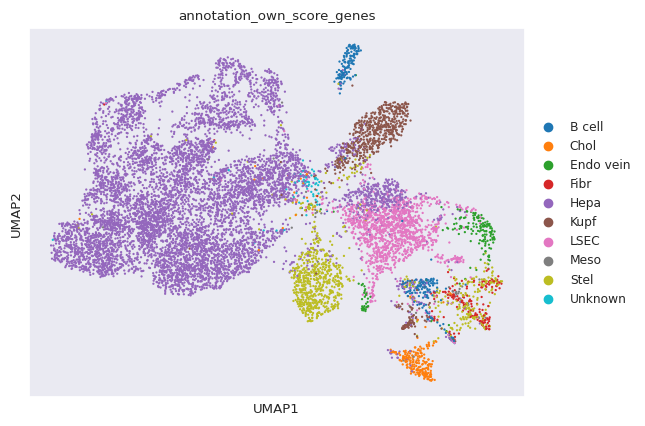

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.582829
Chol                         2.155326
Endo vein                    1.585322
Fibr                         1.505166
Hepa                        66.129320
Kupf                         5.931600
LSEC                        11.417884
Meso                         0.409690
Stel                         7.766299
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,NaN,0.021096,0.085765,0.021767,NaN,0.020318,NaN,NaN
1,NaN,0.055902,NaN,NaN,0.376261,NaN,0.241621,NaN,0.526007
2,NaN,NaN,NaN,NaN,0.019384,NaN,0.274330,NaN,0.717227
3,0.199726,NaN,NaN,0.036456,NaN,NaN,0.154209,NaN,0.229382
4,0.234711,NaN,NaN,0.069145,NaN,0.056901,0.022204,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.313497,NaN,NaN,0.059235,NaN,0.061714,0.020161,NaN,NaN
11224,0.511616,NaN,NaN,0.081015,0.051679,0.072720,0.028773,NaN,NaN
11225,0.354052,NaN,NaN,0.058203,0.049886,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.063038,0.602880,0.242782,NaN,NaN


In [26]:
scores = own_score_genes(sdata,path_mg,scale_score_q=5)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


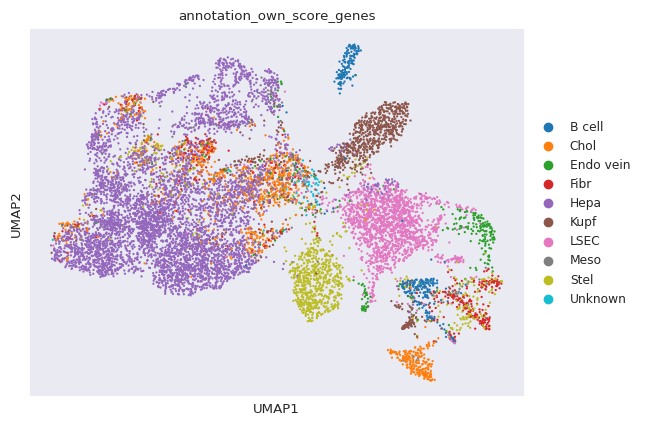

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.215176
Chol                         9.342715
Endo vein                    2.671892
Fibr                         3.696117
Hepa                        48.147488
Kupf                         8.363021
LSEC                        14.392590
Meso                         1.193445
Stel                         8.460990
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.321667,NaN,-0.007951,0.009958,-0.023930,NaN,-0.031415,NaN,NaN
1,NaN,-0.010820,NaN,NaN,0.347125,NaN,0.201574,NaN,0.521940
2,NaN,NaN,NaN,NaN,-0.026424,NaN,0.236010,NaN,0.714801
3,-0.176916,NaN,NaN,-0.043439,NaN,NaN,0.109546,NaN,0.222771
4,-0.125464,NaN,NaN,-0.008039,NaN,-0.050863,-0.029430,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.009599,NaN,NaN,-0.018771,NaN,-0.045499,-0.031580,NaN,NaN
11224,0.281763,NaN,NaN,0.004815,0.007379,-0.033235,-0.022514,NaN,NaN
11225,0.050042,NaN,NaN,-0.019889,0.005503,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.019269,0.557504,0.202796,NaN,NaN


In [27]:

scores = own_score_genes(sdata,path_mg,scale_score='ZeroMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


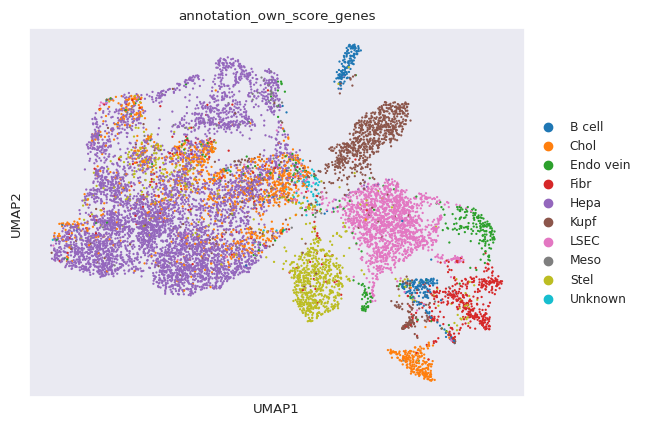

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.698611
Chol                        11.435696
Endo vein                    2.965800
Fibr                         4.862843
Hepa                        46.170289
Kupf                         8.478803
LSEC                        14.089776
Meso                         0.855005
Stel                         7.926612
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,5.724390,NaN,-0.428053,0.390216,-1.935285,NaN,-2.852406,NaN,NaN
1,NaN,-0.451450,NaN,NaN,28.073285,NaN,18.302675,NaN,15.658499
2,NaN,NaN,NaN,NaN,-2.136977,NaN,21.429431,NaN,21.444426
3,-3.148392,NaN,NaN,-1.702138,NaN,NaN,9.946627,NaN,6.683257
4,-2.232764,NaN,NaN,-0.314997,NaN,-2.657646,-2.672196,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.170817,NaN,NaN,-0.735539,NaN,-2.377381,-2.867433,NaN,NaN
11224,5.014245,NaN,NaN,0.188656,0.596784,-1.736590,-2.044225,NaN,NaN
11225,0.890555,NaN,NaN,-0.779333,0.445038,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,1.558340,29.130346,18.413673,NaN,NaN


In [28]:

scores = own_score_genes(sdata,path_mg,scale_score='None')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


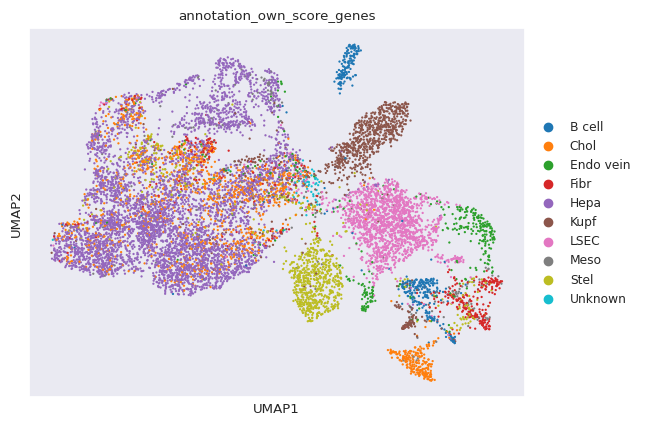

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.651585
Chol                        12.442109
Endo vein                    3.322052
Fibr                         3.705023
Hepa                        43.961525
Kupf                         8.425365
LSEC                        14.071963
Meso                         1.923762
Stel                         7.980050
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.572439,NaN,-0.047561,0.055745,-0.120955,NaN,-0.135829,NaN,NaN
1,NaN,-0.041041,NaN,NaN,1.754580,NaN,0.871556,NaN,3.131700
2,NaN,NaN,NaN,NaN,-0.133561,NaN,1.020449,NaN,4.288885
3,-0.314839,NaN,NaN,-0.243163,NaN,NaN,0.473649,NaN,1.336651
4,-0.223276,NaN,NaN,-0.045000,NaN,-0.166103,-0.127247,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.017082,NaN,NaN,-0.105077,NaN,-0.148586,-0.136544,NaN,NaN
11224,0.501425,NaN,NaN,0.026951,0.037299,-0.108537,-0.097344,NaN,NaN
11225,0.089055,NaN,NaN,-0.111333,0.027815,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.097396,1.820647,0.876842,NaN,NaN


In [29]:

scores = own_score_genes(sdata,path_mg,scale_score='Nmarkers')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


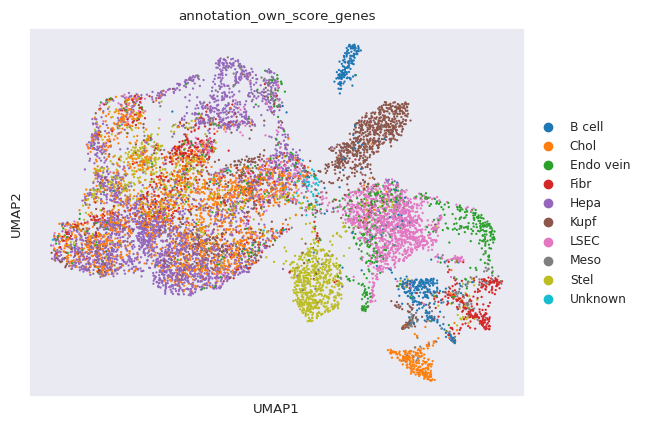

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       4.390809
Chol                        18.694336
Endo vein                    6.341290
Fibr                         6.020663
Hepa                        24.884218
Kupf                        11.863199
LSEC                        13.564304
Meso                         2.858924
Stel                        10.865693
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.874243,NaN,0.725196,0.649092,0.635910,NaN,0.357410,NaN,NaN
1,NaN,0.751648,NaN,NaN,0.969006,NaN,0.958586,NaN,0.998308
2,NaN,NaN,NaN,NaN,0.601443,NaN,0.969451,NaN,0.999198
3,0.288119,NaN,NaN,0.303349,NaN,NaN,0.921179,NaN,0.987887
4,0.340043,NaN,NaN,0.536427,NaN,0.378874,0.402031,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.481831,NaN,NaN,0.467314,NaN,0.427859,0.353758,NaN,NaN
11224,0.839330,NaN,NaN,0.615960,0.845654,0.531172,0.544353,NaN,NaN
11225,0.561275,NaN,NaN,0.460189,0.840399,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.868988,0.984147,0.959209,NaN,NaN


In [30]:

scores = own_score_genes(sdata,path_mg,scale_score='Rank')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores